In [265]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Import Data

In [266]:
#Read data from file
filename = 'listings.csv'
df = pd.read_csv(filename)

In [267]:
df.shape

(15854, 75)

In [268]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27934.0,https://www.airbnb.com/rooms/27934,2.020000e+13,12/28/2022,city scrape,Nice room with superb city view,Our cool and comfortable one bedroom apartment...,It is very center of Bangkok and easy access t...,https://a0.muscache.com/pictures/566374/23157b...,120437,...,4.91,4.66,4.75,NaN,f,2,2,0,0,0.50
1,941865.0,https://www.airbnb.com/rooms/941865,2.020000e+13,12/28/2022,city scrape,Suite Room 3 at MetroPoint,<b>The space</b><br />MetroPoint Bangkok Hotel...,NaN,https://a0.muscache.com/pictures/13930311/1a1c...,610315,...,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
2,27979.0,https://www.airbnb.com/rooms/27979,2.020000e+13,12/28/2022,city scrape,"Easy going landlord,easy place","<b>The space</b><br />""The village Condominium...",NaN,https://a0.muscache.com/pictures/106247594/1d6...,120541,...,NaN,NaN,NaN,NaN,f,2,1,1,0,NaN
3,28745.0,https://www.airbnb.com/rooms/28745,2.020000e+13,12/28/2022,city scrape,modern-style apartment in Bangkok,A modern-style apartment situated in a cool ne...,Ramkumheang neigbourhood - hip place with food...,https://a0.muscache.com/pictures/160369/92a7ec...,123784,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
4,35780.0,https://www.airbnb.com/rooms/35780,2.020000e+13,12/28/2022,city scrape,Spacious one bedroom at The Kris Condo Bldg. 3,Cozy and clean apartment at MRT Sutthisarn sta...,"There is McDonald's, Au bon Pain and Max Value...",https://a0.muscache.com/pictures/89302e4b-b529...,153730,...,4.50,4.50,5.00,NaN,f,1,0,1,0,0.03


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15854 non-null  float64
 1   listing_url                                   15854 non-null  object 
 2   scrape_id                                     15854 non-null  float64
 3   last_scraped                                  15854 non-null  object 
 4   source                                        15854 non-null  object 
 5   name                                          15846 non-null  object 
 6   description                                   15248 non-null  object 
 7   neighborhood_overview                         8375 non-null   object 
 8   picture_url                                   15854 non-null  object 
 9   host_id                                       15854 non-null 

In [270]:
data = df.copy()
data = data[['property_type','room_type','amenities','accommodates','bathrooms_text','bedrooms','beds','neighbourhood_cleansed','first_review','host_has_profile_pic','host_identity_verified','host_response_rate','host_since','instant_bookable','last_review','latitude','longitude','number_of_reviews','review_scores_rating','price']]

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   property_type           15854 non-null  object 
 1   room_type               15854 non-null  object 
 2   amenities               15854 non-null  object 
 3   accommodates            15854 non-null  int64  
 4   bathrooms_text          15752 non-null  object 
 5   bedrooms                14466 non-null  float64
 6   beds                    15509 non-null  float64
 7   neighbourhood_cleansed  15854 non-null  object 
 8   first_review            10064 non-null  object 
 9   host_has_profile_pic    15854 non-null  object 
 10  host_identity_verified  15854 non-null  object 
 11  host_response_rate      12917 non-null  object 
 12  host_since              15854 non-null  object 
 13  instant_bookable        15854 non-null  object 
 14  last_review             10064 non-null

In [272]:
def clean_outliers(data,column) :
    seventy_fifth = data[column].quantile(0.75)
    twenty_fifth = data[column].quantile(0.25)
    iqr = seventy_fifth - twenty_fifth
    upper = seventy_fifth + (1.5 * iqr)
    lower = twenty_fifth - (1.5 * iqr)
    data_clean = data[ (data[column] > lower) & (data[column] < upper) ]
    return data_clean

def drop_by_theshold(data,column) :
    theshold_drop = 0.05 * len(df)
    if data[column].isna().sum() <= theshold_drop :
        data = data.dropna(subset=[column])
        data = data.reset_index(drop = True)
        print('null count after drop NaN = ', data[column].isna().sum())
    else : print('null > 5% of data; can\'t drop ')
    return data


#### property_type

In [273]:
## property_type ##

print(' null count = ', data['property_type'].isna().sum())

 null count =  0


In [274]:
print(data['property_type'].value_counts())

Entire condo                   3771
Entire rental unit             3769
Private room in rental unit    1601
Private room in condo           876
Room in hotel                   695
                               ... 
Private room in tipi              1
Shared room in loft               1
Private room in farm stay         1
Treehouse                         1
Shipping container                1
Name: property_type, Length: 85, dtype: int64


In [275]:
property_categories = ['Entire','Shared', 'Privete', 'Room']
entire = 'Entire'
shared = 'Shared'
private = 'Private'
room = 'Room'

conditions = [ (data['property_type'].str.contains(entire)),
                (data['property_type'].str.contains(shared)),
                (data['property_type'].str.contains(private)),
                (data['property_type'].str.contains(room))]

data['property_cate'] = np.select(conditions,property_categories, default='Other')

data['property_cate'].value_counts(ascending = True)

Other        39
Shared      523
Room       1726
Privete    4748
Entire     8818
Name: property_cate, dtype: int64

#### room_type

In [276]:
print('null count = ', data['room_type'].isna().sum())

null count =  0


In [277]:
data['room_type'].value_counts()

Entire home/apt    8912
Private room       5770
Hotel room          649
Shared room         523
Name: room_type, dtype: int64

In [278]:
data[['property_cate','room_type']].head(10) # drop property

,property_cate,room_type
0,Entire,Entire home/apt
1,Privete,Private room
2,Privete,Private room
3,Privete,Private room
4,Privete,Private room
5,Privete,Private room
6,Privete,Private room
7,Entire,Entire home/apt
8,Privete,Private room
9,Privete,Private room


In [279]:
data = data.drop(columns=['property_type','property_cate'])

#### amenities

In [280]:
# data['amenities']

In [281]:
# data['amenities'] = data['amenities'].str.lower()
# for i in data['amenities'].index :
#     data['clean_amenities'][i] = re.sub(r'\"|\[|\]|\\', '', data['amenities'][i])
    
# data[['amenities','clean_amenities']].head(15665)

In [282]:
# ### ver2
# amenities_set = set()
# for amenitie in data['amenities']:
#     amenitie_set = set(re.sub(r'\"|\[|\]|\\', '', amenitie).split(','))
#     for piece in amenitie_set:
#         if "translation missing" not in piece and piece:
#             amenities_set.add(piece.strip())
            
# amenities_set

In [283]:
### ver1

# # amenities : str
# data['amenities'] = data['amenities'].str.replace('[' , '', regex=True)
# data['amenities'] = data['amenities'].str.replace(']' , '', regex=True)
# data['amenities'] = data['amenities'].str.replace('"' , '', regex=True)
# data['amenities'] = data['amenities'].str.lower()

# amenities_list = [ [ word for word in row.split(',') ] for row in data['amenities'] ]

# cols = set( word for row in amenities_list for word in row)
# cols.remove('')
# print('number of list in amenities_list =', len(amenities_list))
# print('number of amenities =', len(cols))

In [284]:
# amenities_list

In [285]:
# amenities_df = pd.DataFrame(columns= list(cols))
# for row_idx in range(len(amenities_list)):
#     for col in cols:
#         amenities_df.loc[row_idx,col] = int((lambda x : x in amenities_list[row_idx])(col))


# amenities_df

#### accommodates

In [286]:
print('null count = ', data['accommodates'].isna().sum())

null count =  0


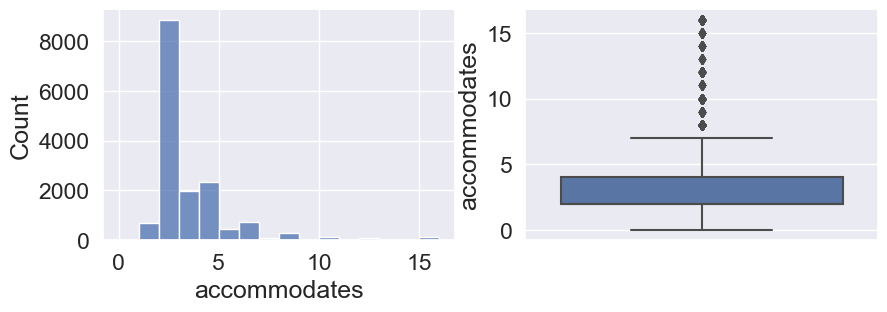

In [287]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.histplot(data=data, x='accommodates', binwidth = 1)

plt.subplot(1,2,2)
sns.boxplot(data=data, y='accommodates')
plt.show()

#### bathrooms_text

In [288]:
print('null count = ', data['bathrooms_text'].isna().sum())
data['bathrooms_text'] = data['bathrooms_text'].str.lower()
print(data['bathrooms_text'])

null count =  102
0             1.5 baths
1                1 bath
2                1 bath
3                1 bath
4        1 private bath
              ...      
15849            1 bath
15850    1 private bath
15851            1 bath
15852            1 bath
15853            1 bath
Name: bathrooms_text, Length: 15854, dtype: object


In [289]:
data = drop_by_theshold(data,'bathrooms_text')
data

null count after drop NaN =  0


,room_type,amenities,accommodates,bathrooms_text,bedrooms,beds,neighbourhood_cleansed,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,price
0,Entire home/apt,"[""Shampoo"", ""Kitchen"", ""Fire extinguisher"", ""F...",3,1.5 baths,1.0,1.0,Ratchathewi,4/7/2012,t,t,100%,5/8/2010,f,1/6/2020,13.759830,100.541340,65,4.85,"$1,905.00"
1,Private room,"[""Washer"", ""Air conditioning"", ""Breakfast"", ""K...",2,1 bath,1.0,1.0,Bang Kapi,NaN,t,t,100%,5/21/2011,f,NaN,13.768720,100.633380,0,NaN,"$1,905.00"
2,Private room,"[""Pool"", ""Washer"", ""First aid kit"", ""Heating"",...",2,1 bath,1.0,2.0,Bang Na,NaN,t,f,0%,5/8/2010,f,NaN,13.668180,100.616740,0,NaN,"$1,316.00"
3,Private room,"[""Long term stays allowed""]",2,1 bath,1.0,1.0,Bang Kapi,NaN,t,f,NaN,5/12/2010,f,NaN,13.752320,100.624020,0,NaN,$800.00
4,Private room,"[""Clothing storage: closet and dresser"", ""Blen...",2,1 private bath,1.0,1.0,Din Daeng,7/13/2016,t,t,100%,6/27/2010,f,4/1/2022,13.788230,100.572560,2,4.50,"$1,286.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,Entire home/apt,"[""Paid parking on premises"", ""Shampoo"", ""Kitch...",2,1 bath,1.0,1.0,Ratchathewi,NaN,t,t,79%,10/28/2022,t,NaN,13.753731,100.562267,0,NaN,"$1,218.00"
15748,Private room,"[""Building staff"", ""Shampoo"", ""Bidet"", ""Kitche...",2,1 private bath,1.0,1.0,Chatu Chak,NaN,t,t,100%,11/24/2019,t,NaN,13.798903,100.564166,0,NaN,$950.00
15749,Entire home/apt,"[""Paid parking on premises"", ""Shampoo"", ""Kitch...",2,1 bath,1.0,1.0,Ratchathewi,NaN,t,t,79%,10/28/2022,t,NaN,13.754188,100.563269,0,NaN,"$1,218.00"
15750,Entire home/apt,"[""Kitchen"", ""Lockbox"", ""Drying rack for clothi...",2,1 bath,1.0,1.0,Bang Phlat,NaN,t,t,100%,7/11/2018,t,NaN,13.788938,100.503600,0,NaN,"$3,822.00"


In [290]:
bath_new = list() # some bathrooms_text don't start with number 0-9

for row in data['bathrooms_text'] :
    if row[0] not in '0123456789' :
        row = '1 ' + row
        bath_new.append(row)
    else : bath_new.append(row)


bath_df = pd.DataFrame(bath_new, columns = ['bath_new'])
bath_df

,bath_new
0,1.5 baths
1,1 bath
2,1 bath
3,1 bath
4,1 private bath
...,...
15747,1 bath
15748,1 private bath
15749,1 bath
15750,1 bath


In [291]:
data = pd.concat([data, bath_df], axis = 1)

print('null count = ', data['bath_new'].isna().sum())

null count =  0


In [292]:
data[['bath_size', 'bath_type']] = data['bath_new'].str.split(' ', 1, expand = True)
data['bath_size'] = data['bath_size'].astype(float)

data[['bath_size', 'bath_type']].head(20)

,bath_size,bath_type
0,1.5,baths
1,1.0,bath
2,1.0,bath
3,1.0,bath
4,1.0,private bath
5,1.0,private bath
6,1.0,bath
7,1.0,bath
8,1.0,private bath
9,1.0,bath


In [293]:
data = data.drop(columns=['bath_new','bathrooms_text'])

In [294]:
data['bath_type'].value_counts()

bath                 7326
baths                3498
private bath         3347
shared baths          930
shared bath           595
half-bath              25
shared half-bath       24
private half-bath       7
Name: bath_type, dtype: int64

In [295]:
data['bath_type'] = data['bath_type'].replace(['baths','shared baths','shared half-bath','private half-bath'],
                                              ['bath','shared bath','half-bath','half-bath'])

data['bath_type'].value_counts()

bath            10824
private bath     3347
shared bath      1525
half-bath          56
Name: bath_type, dtype: int64

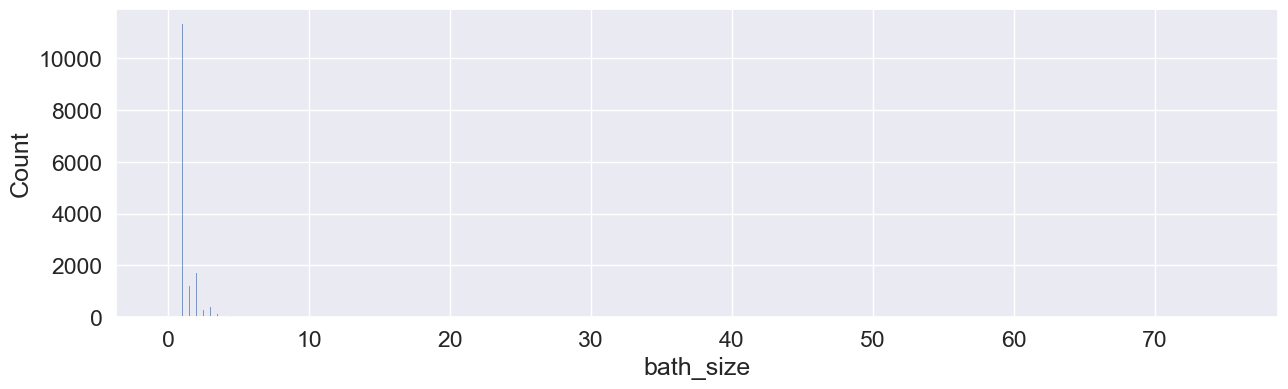

In [296]:
plt.figure(figsize=(15,4))
sns.histplot(data=data, x = 'bath_size')
plt.show()

#### bedrooms

In [297]:
print('null count = ', data['bedrooms'].isna().sum())
print(data['bedrooms'])

null count =  1380
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15747    1.0
15748    1.0
15749    1.0
15750    1.0
15751    1.0
Name: bedrooms, Length: 15752, dtype: float64


In [298]:
data = drop_by_theshold(data,'bedrooms')

null > 5% of data; can't drop 


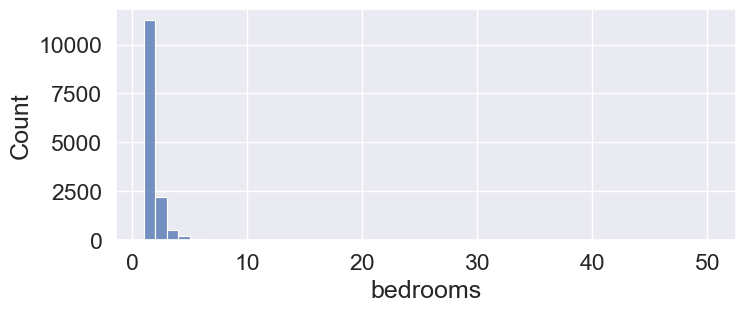

In [299]:
plt.figure(figsize=(8,3))
sns.histplot(data=data, x='bedrooms', bins = 100, binwidth = 1)
plt.show()

In [300]:
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())

print('null count = ', data['bedrooms'].isna().sum())
print(data['bedrooms'])

null count =  0
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
15747    1.0
15748    1.0
15749    1.0
15750    1.0
15751    1.0
Name: bedrooms, Length: 15752, dtype: float64


#### beds

In [301]:
print('null count = ', data['beds'].isna().sum())
print(data['beds'])
print('---------------------------')
data = drop_by_theshold(data,'beds')

null count =  330
0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
15747    1.0
15748    1.0
15749    1.0
15750    1.0
15751    1.0
Name: beds, Length: 15752, dtype: float64
---------------------------
null count after drop NaN =  0


#### neighbourhood_cleansed

In [302]:
print('null count = ', data['neighbourhood_cleansed'].isna().sum())
print(data['neighbourhood_cleansed'])

null count =  0
0        Ratchathewi
1          Bang Kapi
2            Bang Na
3          Bang Kapi
4          Din Daeng
            ...     
15417    Ratchathewi
15418     Chatu Chak
15419    Ratchathewi
15420     Bang Phlat
15421    Khlong Toei
Name: neighbourhood_cleansed, Length: 15422, dtype: object


In [303]:
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].str.lower()
data['neighbourhood_cleansed'].nunique()

50

In [304]:
data['neighbourhood_cleansed'].value_counts()

vadhana                 2106
khlong toei             2057
huai khwang             1091
ratchathewi             1084
bang rak                 817
sathon                   792
phra nakhon              602
phra khanong             546
chatu chak               530
parthum wan              442
bang na                  433
din daeng                428
phaya thai               412
suanluang                372
khlong san               341
bang kapi                246
bang sue                 244
bang phlat               209
yan na wa                196
thon buri                177
don mueang               161
phasi charoen            151
bangkok noi              151
pra wet                  149
lat krabang              142
bang kho laen            139
lak si                   122
pom prap sattru phai     121
bang khen                111
samphanthawong           109
wang thong lang           89
dusit                     88
bang khae                 86
bangkok yai               83
chom thong    

#### first_review

In [305]:
print('null count = ', data['first_review'].isna().sum())
print(data['first_review'])

null count =  5546
0         4/7/2012
1              NaN
2              NaN
3              NaN
4        7/13/2016
           ...    
15417          NaN
15418          NaN
15419          NaN
15420          NaN
15421          NaN
Name: first_review, Length: 15422, dtype: object


In [306]:
data['first_review'] = pd.to_datetime(data['first_review'])
data['first_review'].dtype

dtype('<M8[ns]')

#### host_has_profile_pic

In [307]:
print('null count = ', data['host_has_profile_pic'].isna().sum())
data['host_has_profile_pic'].value_counts()

null count =  0


t    15284
f      138
Name: host_has_profile_pic, dtype: int64

#### host_identity_verified

In [308]:
print('null count = ', data['host_identity_verified'].isna().sum())
data['host_identity_verified'].value_counts()

null count =  0


t    11310
f     4112
Name: host_identity_verified, dtype: int64

#### host_response_rate 

In [309]:
print('null count = ', data['host_response_rate'].isna().sum())
print(data['host_response_rate'].head(5))

data = drop_by_theshold(data,'host_response_rate')

null count =  2813
0    100%
1    100%
2      0%
3     NaN
4    100%
Name: host_response_rate, dtype: object
null > 5% of data; can't drop 


In [310]:
data['host_response_rate'] = data['host_response_rate'].str.replace('%','')
print(data['host_response_rate'].head(5))

0    100
1    100
2      0
3    NaN
4    100
Name: host_response_rate, dtype: object


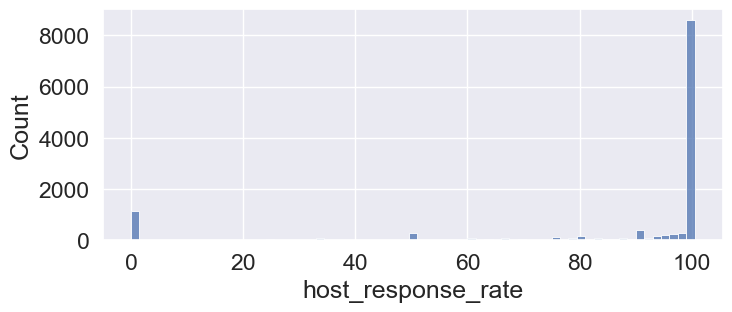

In [311]:
rate = data['host_response_rate'].dropna().astype(int)

plt.figure(figsize=(8,3.))
sns.histplot(data=rate, binwidth = 1.5)
plt.show()

In [312]:
data['host_response_rate'] = data['host_response_rate'].fillna(0)

data['host_response_rate'] = data['host_response_rate'].astype('int64')
print(data['host_response_rate'].head(5))

0    100
1    100
2      0
3      0
4    100
Name: host_response_rate, dtype: int64


#### host_since

In [313]:
print('null count = ', data['host_since'].isna().sum())

data['host_since'] = pd.to_datetime(data['host_since'])
print(data['host_since'].head(5))

null count =  0
0   2010-05-08
1   2011-05-21
2   2010-05-08
3   2010-05-12
4   2010-06-27
Name: host_since, dtype: datetime64[ns]


#### instant_bookable

In [314]:
print('null count = ', data['instant_bookable'].isna().sum())

data['instant_bookable'].value_counts()

null count =  0


t    8500
f    6922
Name: instant_bookable, dtype: int64

#### last_review

In [315]:
print('null count = ', data['last_review'].isna().sum())

data['last_review'] = pd.to_datetime(data['last_review'])
print(data['last_review'].head(5))

null count =  5546
0   2020-01-06
1          NaT
2          NaT
3          NaT
4   2022-04-01
Name: last_review, dtype: datetime64[ns]


#### latitude

null count =  0


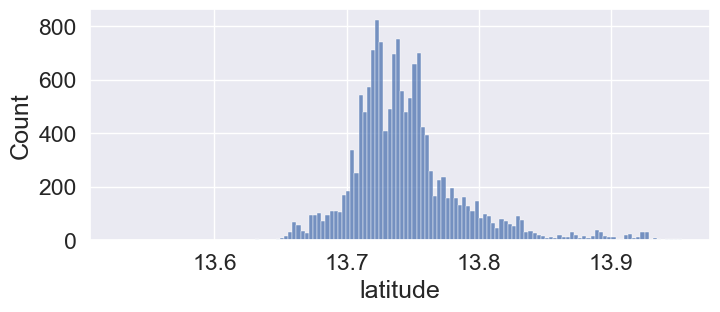

In [316]:
print('null count = ', data['latitude'].isna().sum())

plt.figure(figsize=(8,3))
sns.histplot(data=data, x ='latitude')
plt.show()

#### longitude

null count =  0


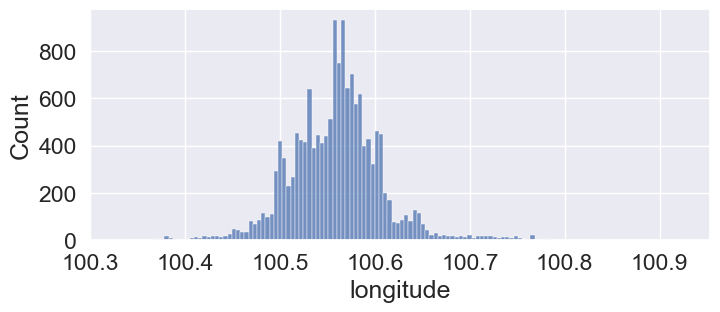

In [317]:
print('null count = ', data['longitude'].isna().sum())

plt.figure(figsize=(8,3))
sns.histplot(data=data, x ='longitude')
plt.show()

#### number_of_reviews 

In [318]:
print('null count = ', data['number_of_reviews'].isna().sum())

data['number_of_reviews'].value_counts(ascending=False)

null count =  0


0      5546
1      1677
2       921
3       663
4       499
       ... 
323       1
202       1
241       1
486       1
263       1
Name: number_of_reviews, Length: 298, dtype: int64

#### review_scores_rating

In [319]:
print('null count = ', data['review_scores_rating'].isna().sum())

data = drop_by_theshold(data,'review_scores_rating')

null count =  5546
null > 5% of data; can't drop 


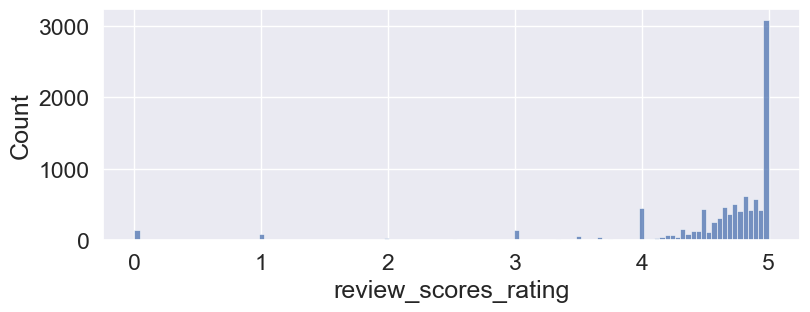

In [320]:
plt.figure(figsize=(9,3))
sns.histplot(data=data, x='review_scores_rating')
plt.show()

In [321]:
 data['review_scores_rating'].median()

4.8

#### price

In [322]:
print('null count = ', data['price'].isna().sum())

data['price'].value_counts()

null count =  0


$1,500.00     402
$1,200.00     393
$1,000.00     389
$800.00       295
$2,000.00     259
             ... 
$518.00         1
$3,227.00       1
$507.00         1
$1,624.00       1
$2,304.00       1
Name: price, Length: 2996, dtype: int64

In [323]:
data['price'] = data['price'].str.strip('$').str.replace(',','').astype(float)

In [324]:
data['price'].describe()

count    1.542200e+04
mean     3.228002e+03
std      2.526874e+04
min      2.780000e+02
25%      9.000000e+02
50%      1.426000e+03
75%      2.424000e+03
max      1.100000e+06
Name: price, dtype: float64

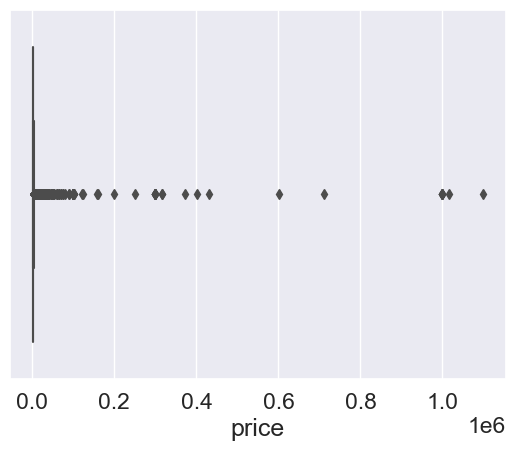

In [325]:
sns.boxplot(data = data, x='price')
plt.show()

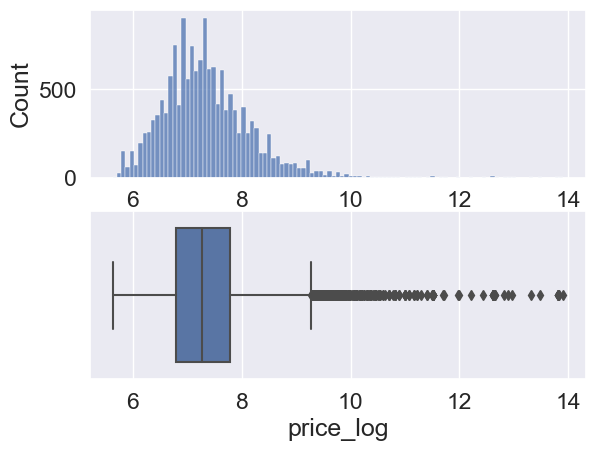

In [326]:
data['price_log'] = np.log(data['price'])

plt.subplot(2,1,1)
sns.histplot(data = data, x='price_log')
plt.subplot(2,1,2)
sns.boxplot(data = data, x='price_log')
plt.show()

In [327]:
data_clean = clean_outliers(data,'price_log')
data_clean = data_clean.drop(columns=['price'])

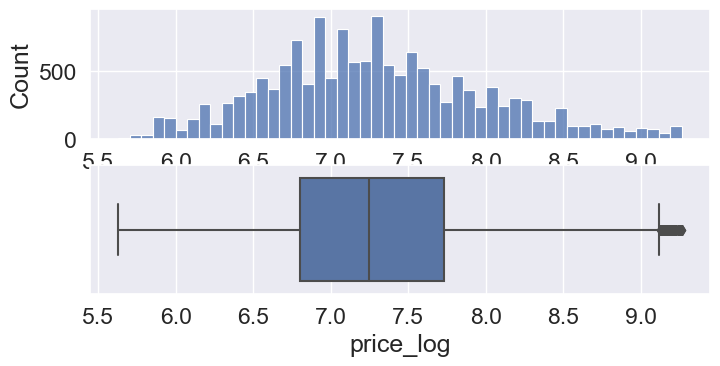

In [328]:
plt.figure(figsize=(8,3.7))

plt.subplot(2,1,1)
sns.histplot(data = data_clean, x='price_log')
plt.subplot(2,1,2)
sns.boxplot(data = data_clean, x='price_log')
plt.show()

In [329]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15079 entries, 0 to 15421
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   room_type               15079 non-null  object        
 1   amenities               15079 non-null  object        
 2   accommodates            15079 non-null  int64         
 3   bedrooms                15079 non-null  float64       
 4   beds                    15079 non-null  float64       
 5   neighbourhood_cleansed  15079 non-null  object        
 6   first_review            9718 non-null   datetime64[ns]
 7   host_has_profile_pic    15079 non-null  object        
 8   host_identity_verified  15079 non-null  object        
 9   host_response_rate      15079 non-null  int64         
 10  host_since              15079 non-null  datetime64[ns]
 11  instant_bookable        15079 non-null  object        
 12  last_review             9718 non-null   dateti

In [330]:
# % number of null in first_review, last_review , review_scores_rating

print( '% number of null = {:.2f}'.format(1-(9718/15079)) )

% number of null = 0.36


In [331]:
data_clean[['first_review','last_review','review_scores_rating']].dropna()
# first_review, last_review, review_scores_rating occur together -> assume 0 review_scores_rating if NaN

,first_review,last_review,review_scores_rating
0,2012-04-07,2020-01-06,4.85
4,2016-07-13,2022-04-01,4.50
5,2013-03-31,2019-12-27,2.50
6,2014-02-03,2014-02-03,5.00
8,2011-03-16,2019-01-03,4.77
...,...,...,...
15267,2022-12-25,2022-12-25,5.00
15292,2022-12-26,2022-12-26,5.00
15310,2022-12-22,2022-12-24,5.00
15323,2022-12-22,2022-12-28,5.00


In [332]:
data_clean['review_scores_rating'] = data_clean['review_scores_rating'].fillna(0)
data_clean = data_clean.drop(columns=['first_review','last_review','host_since'])

data_clean = data_clean.drop(columns=['amenities']) # เดี๋ยวแก้!!!

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15079 entries, 0 to 15421
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   room_type               15079 non-null  object 
 1   accommodates            15079 non-null  int64  
 2   bedrooms                15079 non-null  float64
 3   beds                    15079 non-null  float64
 4   neighbourhood_cleansed  15079 non-null  object 
 5   host_has_profile_pic    15079 non-null  object 
 6   host_identity_verified  15079 non-null  object 
 7   host_response_rate      15079 non-null  int64  
 8   instant_bookable        15079 non-null  object 
 9   latitude                15079 non-null  float64
 10  longitude               15079 non-null  float64
 11  number_of_reviews       15079 non-null  int64  
 12  review_scores_rating    15079 non-null  float64
 13  bath_size               15079 non-null  float64
 14  bath_type               15079 non-null

b

In [333]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,4))
    sns.set(font_scale=1.5)
    sns.violinplot(data=data_clean, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)
    plt.show()

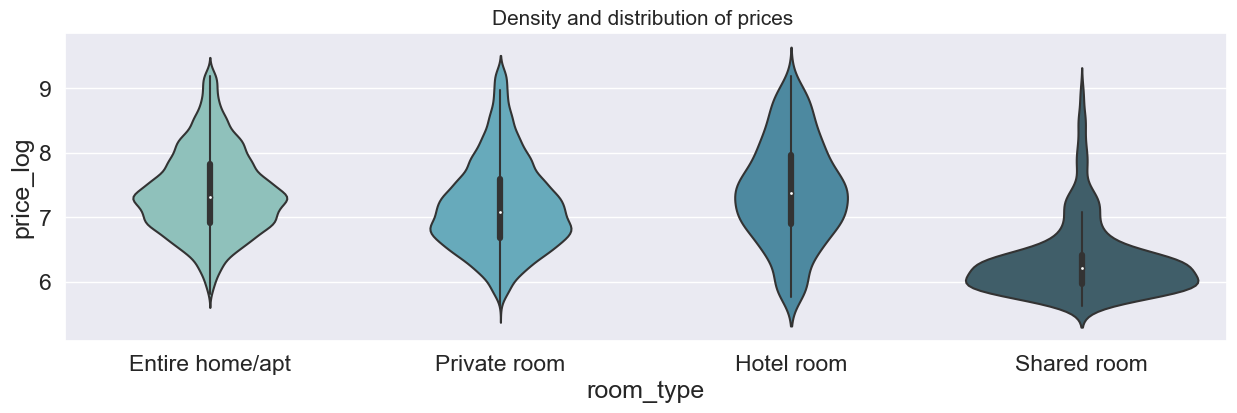

In [334]:
plot_violinplot('room_type','price_log')

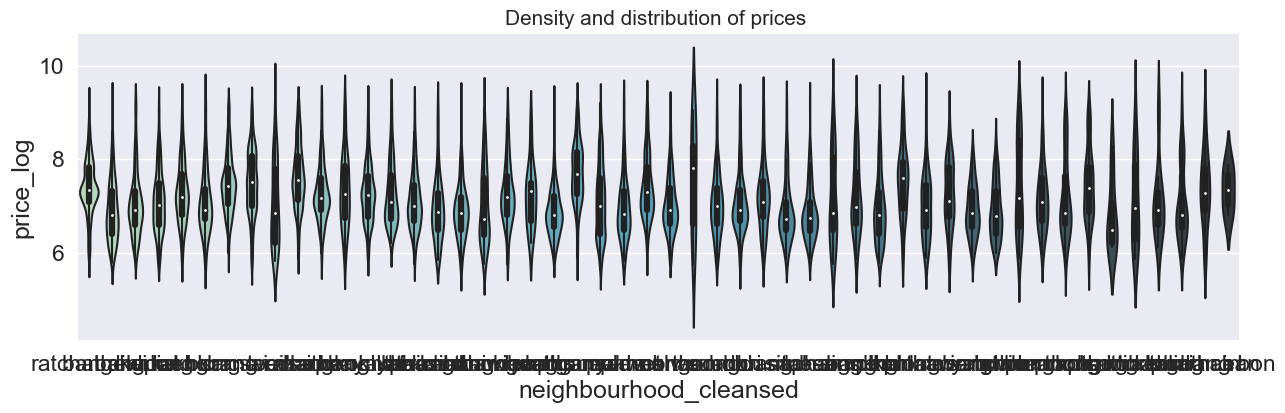

In [335]:
plot_violinplot('neighbourhood_cleansed','price_log') # ไม่ต่างกัน

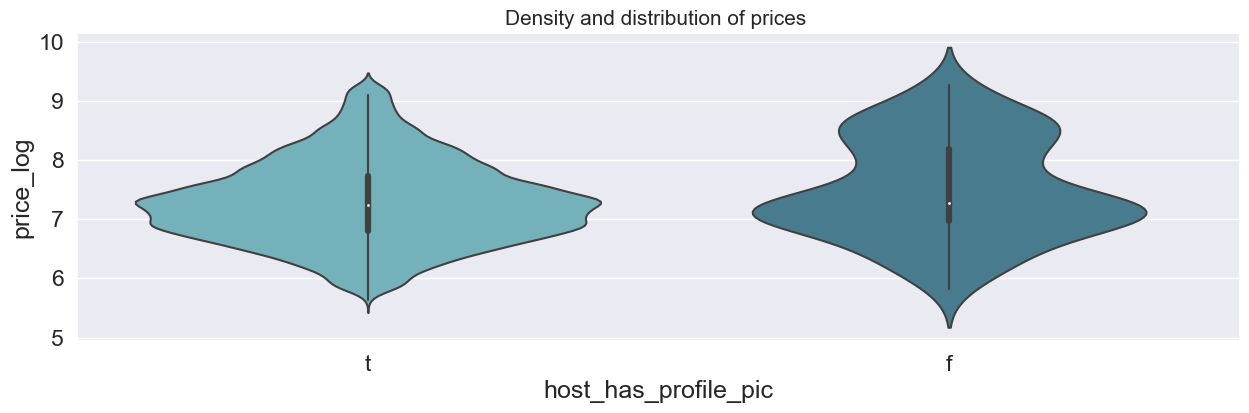

In [336]:
plot_violinplot('host_has_profile_pic','price_log') # ไม่ต่างกัน

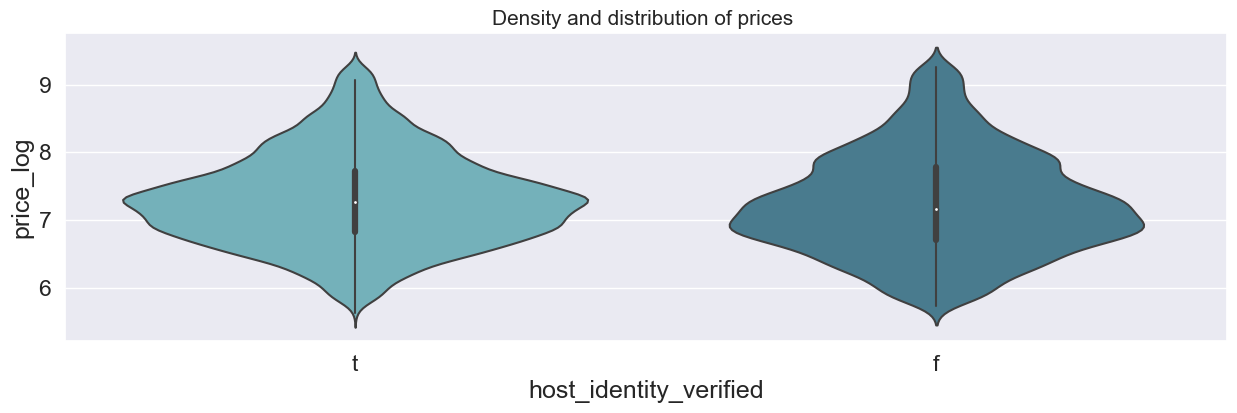

In [337]:
plot_violinplot('host_identity_verified','price_log') # ไม่ต่างกัน

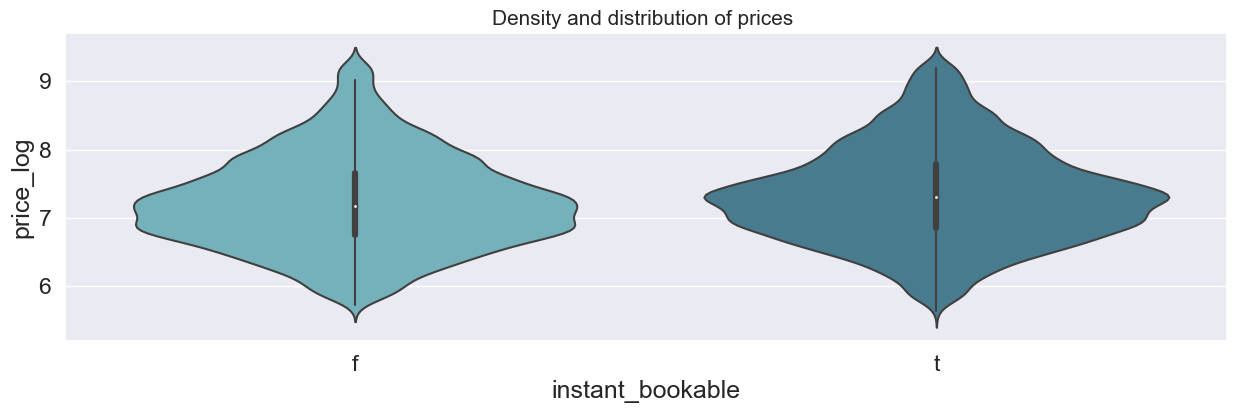

In [338]:
plot_violinplot('instant_bookable','price_log') # ไม่ต่างกัน

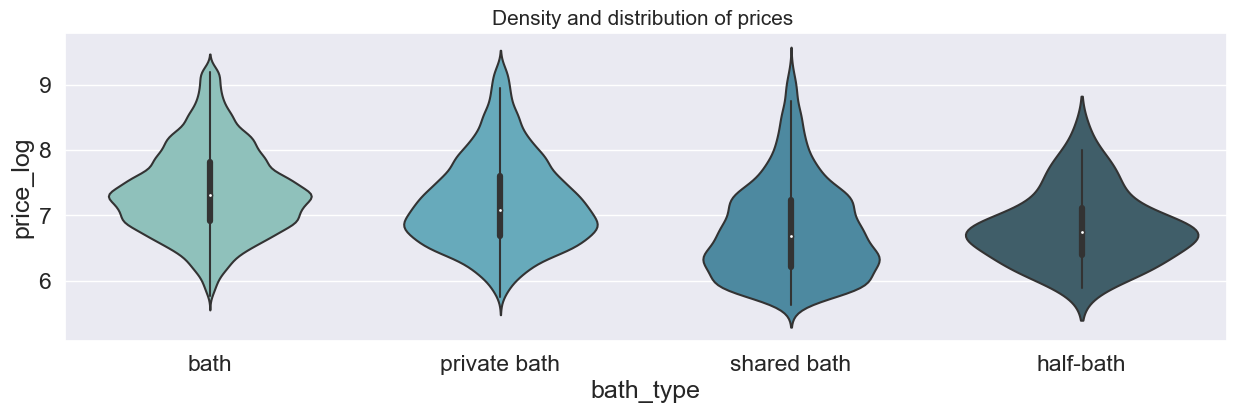

In [339]:
plot_violinplot('bath_type','price_log')

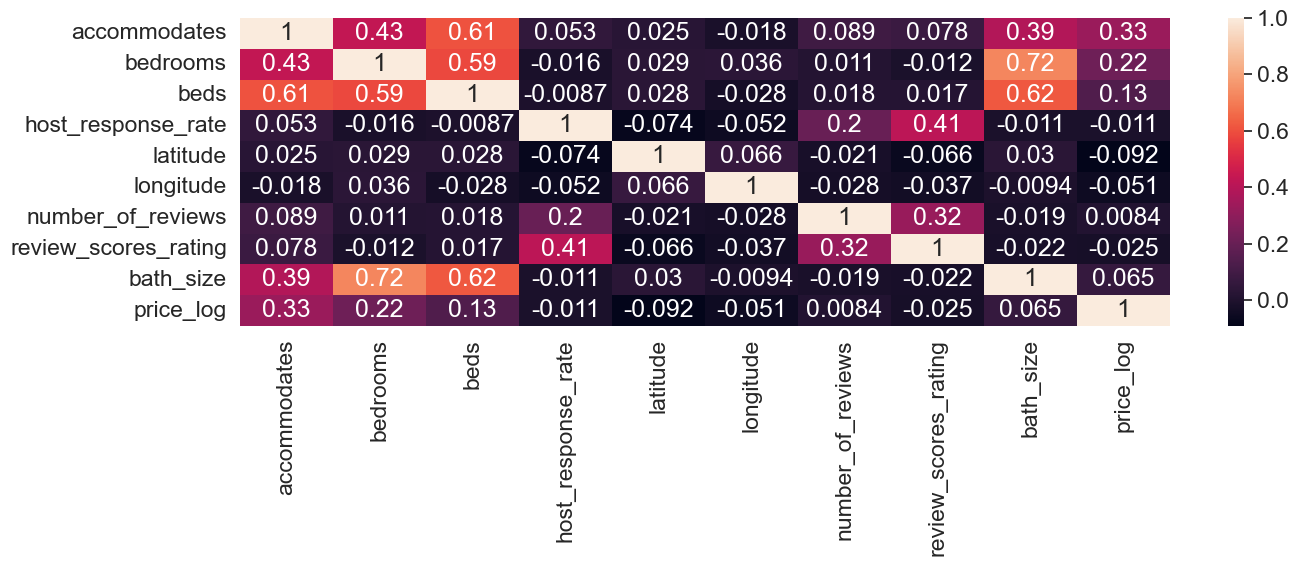

In [340]:
numer_data = data_clean[['accommodates','bedrooms','beds', 'host_response_rate','latitude','longitude','number_of_reviews',
                         'review_scores_rating','bath_size','price_log']].astype(float)

plt.figure(figsize=(15,4))
sns.heatmap(data=numer_data.corr(), annot=True)
plt.show()

In [341]:
def plot_scatterplot(h,v) :
    plt.figure(figsize=(15,4))
    sns.scatterplot(data=data_clean, x=h, y=v)
    plt.xlabel(h)
    plt.ylabel(v)
    plt.show()

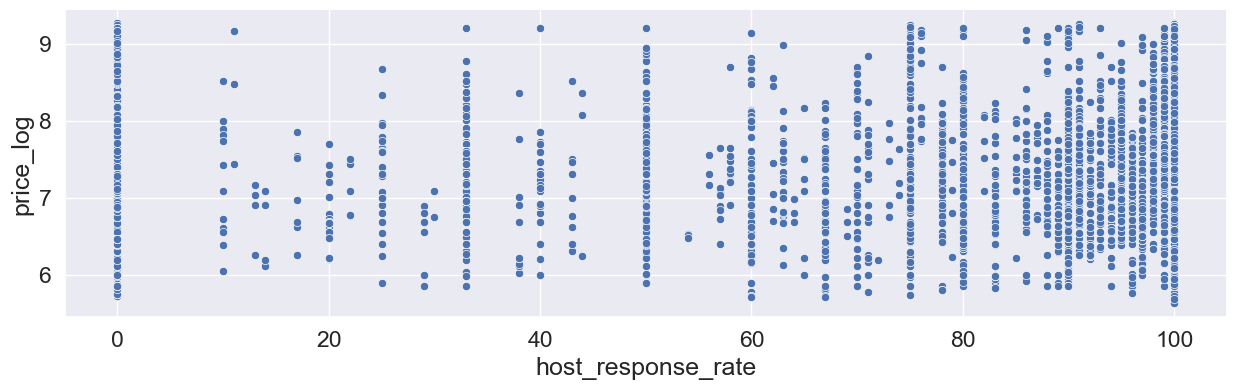

In [342]:
plot_scatterplot('host_response_rate','price_log')

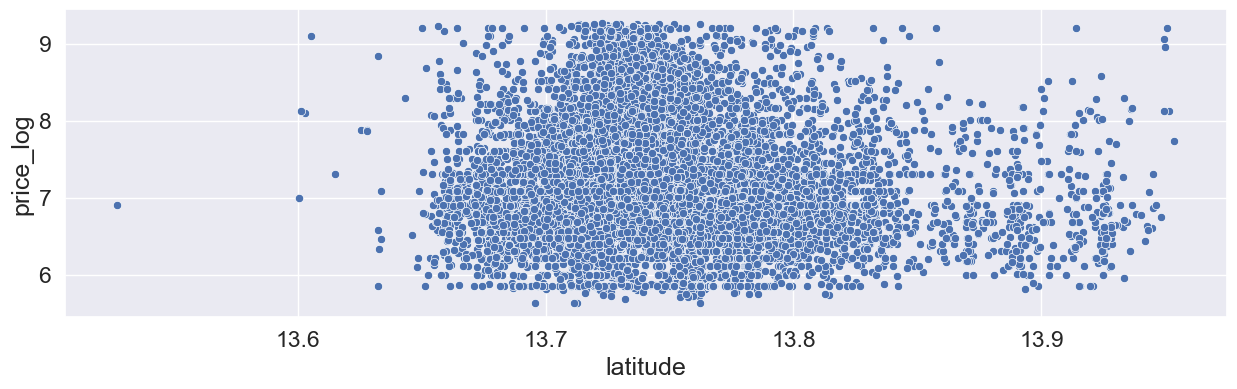

In [343]:
plot_scatterplot('latitude','price_log')

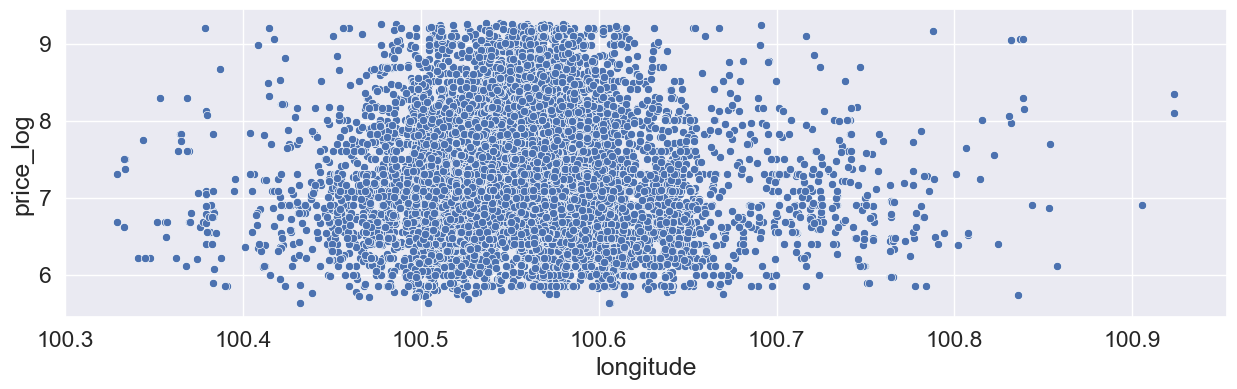

In [344]:
plot_scatterplot('longitude','price_log')

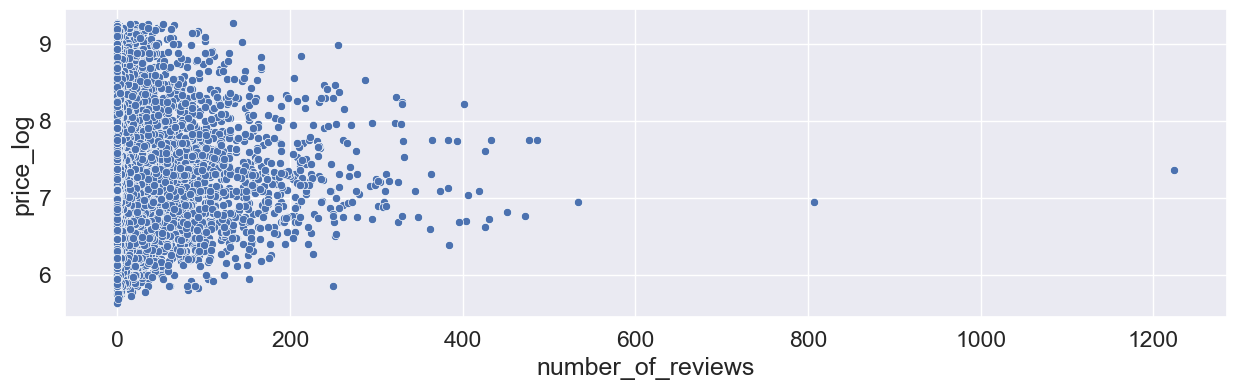

In [345]:
plot_scatterplot('number_of_reviews','price_log')

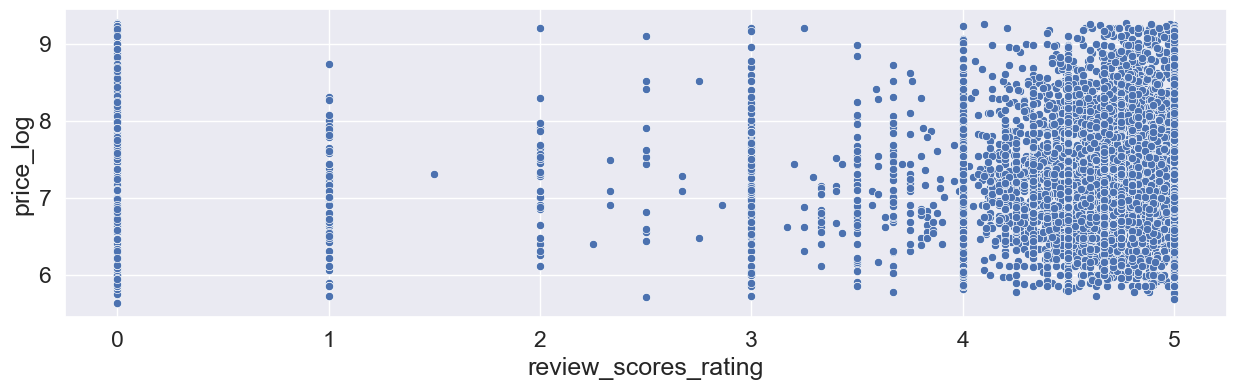

In [346]:
plot_scatterplot('review_scores_rating','price_log')

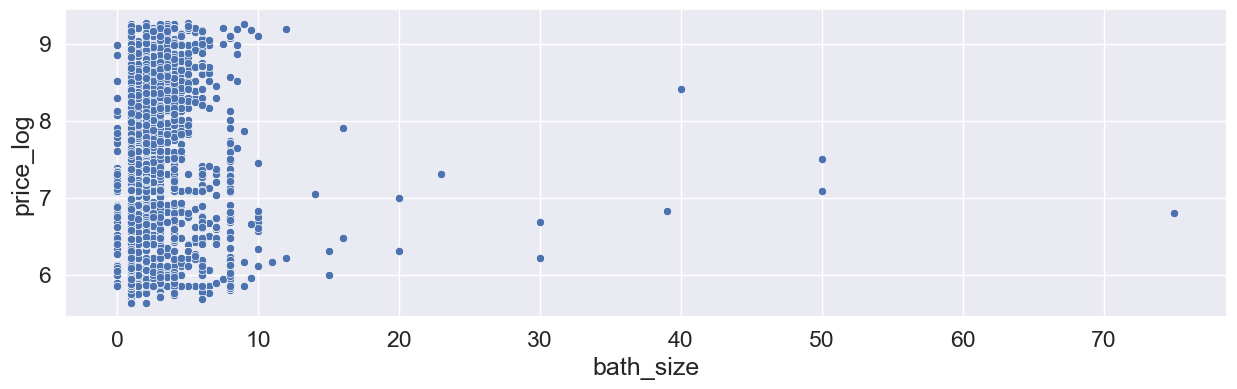

In [347]:
plot_scatterplot('bath_size','price_log')

# Output clean data

In [348]:
data_clean = data_clean.drop(columns=['host_has_profile_pic','neighbourhood_cleansed','host_identity_verified',
                                     'instant_bookable'])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15079 entries, 0 to 15421
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             15079 non-null  object 
 1   accommodates          15079 non-null  int64  
 2   bedrooms              15079 non-null  float64
 3   beds                  15079 non-null  float64
 4   host_response_rate    15079 non-null  int64  
 5   latitude              15079 non-null  float64
 6   longitude             15079 non-null  float64
 7   number_of_reviews     15079 non-null  int64  
 8   review_scores_rating  15079 non-null  float64
 9   bath_size             15079 non-null  float64
 10  bath_type             15079 non-null  object 
 11  price_log             15079 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1.5+ MB


In [349]:
data_clean.to_csv('data_clean.csv')